# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$\nabla_{w} Q(w) = -\frac{2}{n}X^T(y-Xw)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [33]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [34]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)
    
    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [35]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

Почта: vvluzin_1@edu.hse.ru

* **VanillaGradientDescent**:
https://contest.yandex.ru/contest/70588/run-report/124598023/

* **StochasticDescent**:
https://contest.yandex.ru/contest/70588/run-report/124598052/

* **MomentumDescent**:
https://contest.yandex.ru/contest/70588/run-report/124598171/

* **Adam**:
https://contest.yandex.ru/contest/70588/run-report/124598064/

* **LinearRegression**:
* https://contest.yandex.ru/contest/70588/run-report/124598072/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [36]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [37]:
data = pd.read_csv('autos.csv')

In [38]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

EDA

In [39]:
sns.set(style="whitegrid")

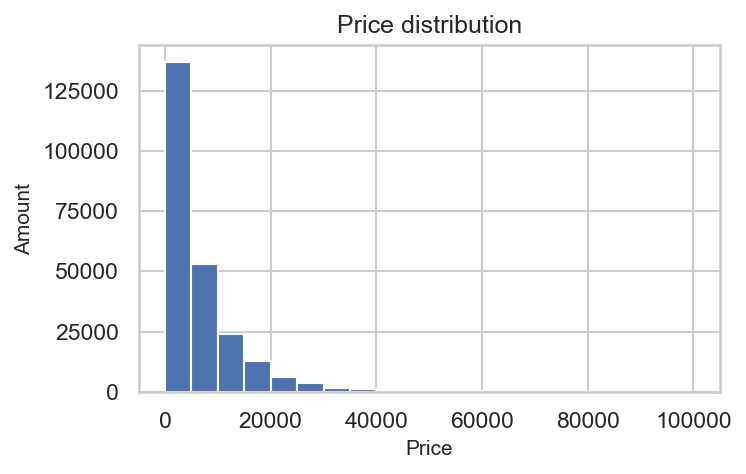

In [40]:
_, ax = plt.subplots(figsize=(5, 3), dpi=150)

ax.hist(data["price"], bins=20)

ax.set_title('Price distribution')
ax.set_xlabel('Price', size=10)
ax.set_ylabel('Amount', size=10)

plt.show()

Таргет лучше логарифмировать, чтобы он приобрёл вид нормального распределения
Видно, что есть небольшие выбросы в сторону сильно низкой цены

In [41]:
data['log_price'] = np.log1p(data["price"])

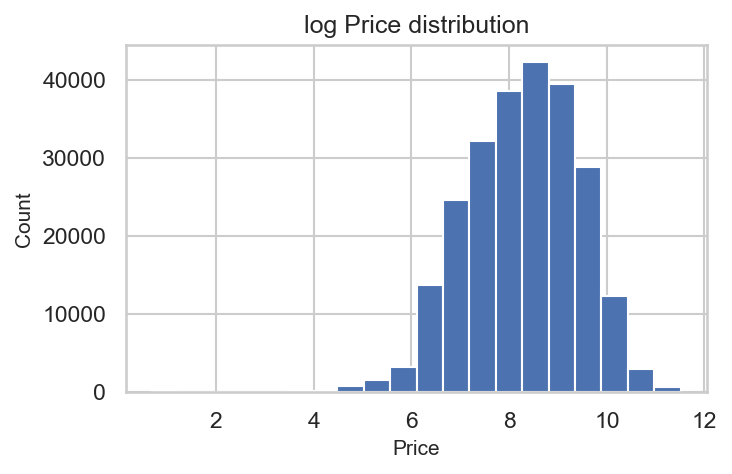

In [42]:
_, ax = plt.subplots(figsize=(5, 3), dpi=150)

ax.hist(data["log_price"], bins=20)

ax.set_title('log Price distribution')
ax.set_xlabel('Price', size=10)
ax.set_ylabel('Count', size=10)

plt.show()

Удалю выбросы с ценой по логарифму меньше 4

In [43]:
data = data[data['log_price'] > 4]

Типы столбцов

In [44]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object

Из графиков зависимости целевой переменной из признаков можно увидеть, что все параметры в какой-то степени могут влиять на итоговую переменную. Лучше всего цены разделаются по мощности автомобиля. Возможно, только автопробег является лишним признаком. Есть проблема, что некоторых категорий очень мало, возможно их можно как-то объединить (например, вынести все редкие бренды в отдельную категорию или по месту производства). Большей части типов топлива тоже очень мало. 

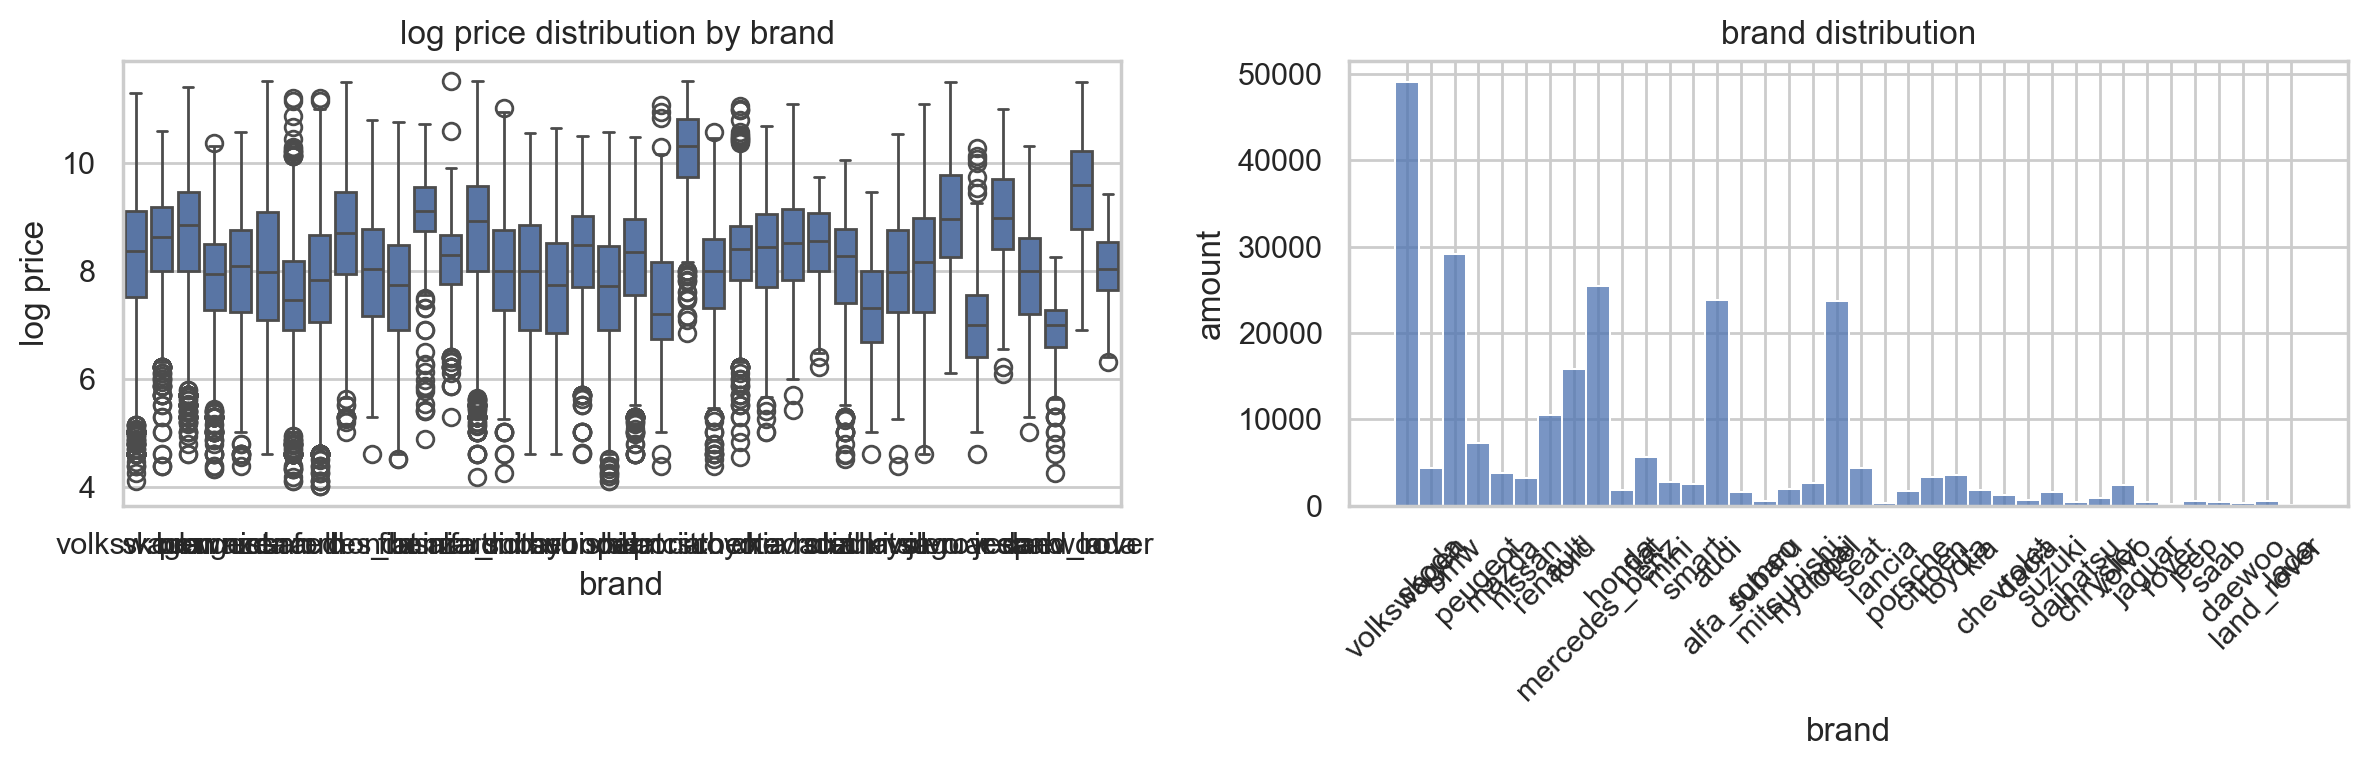

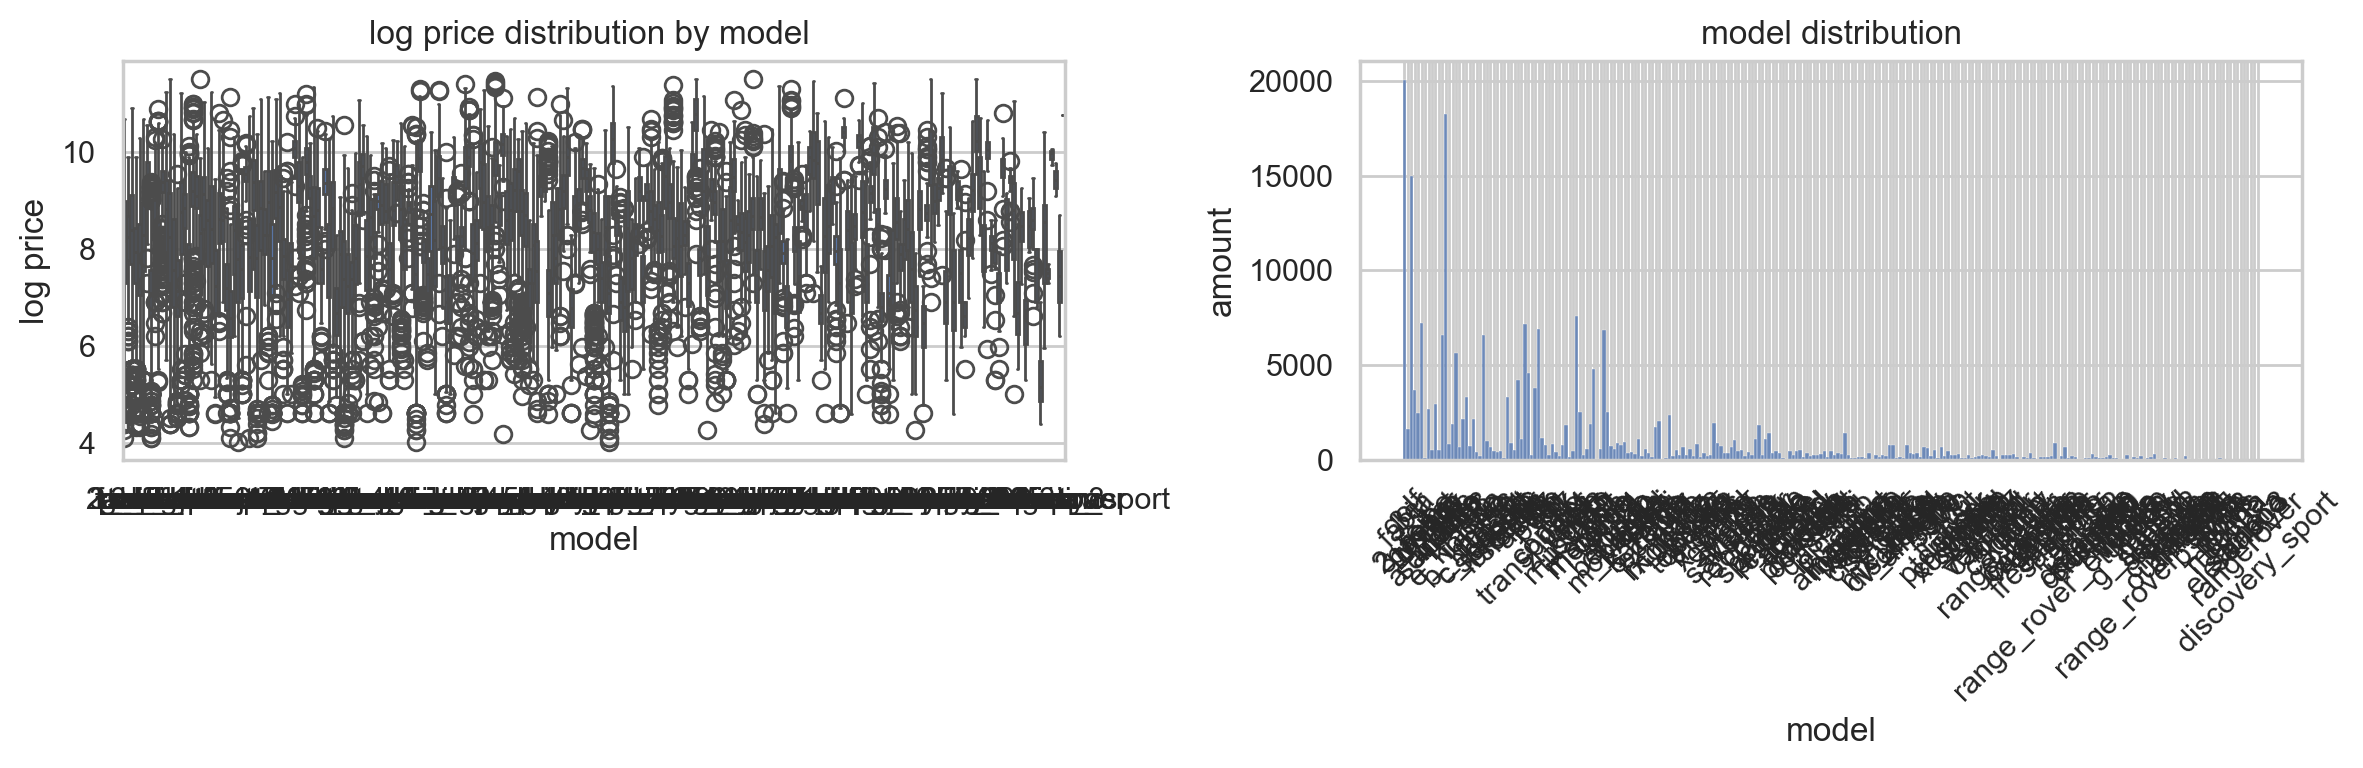

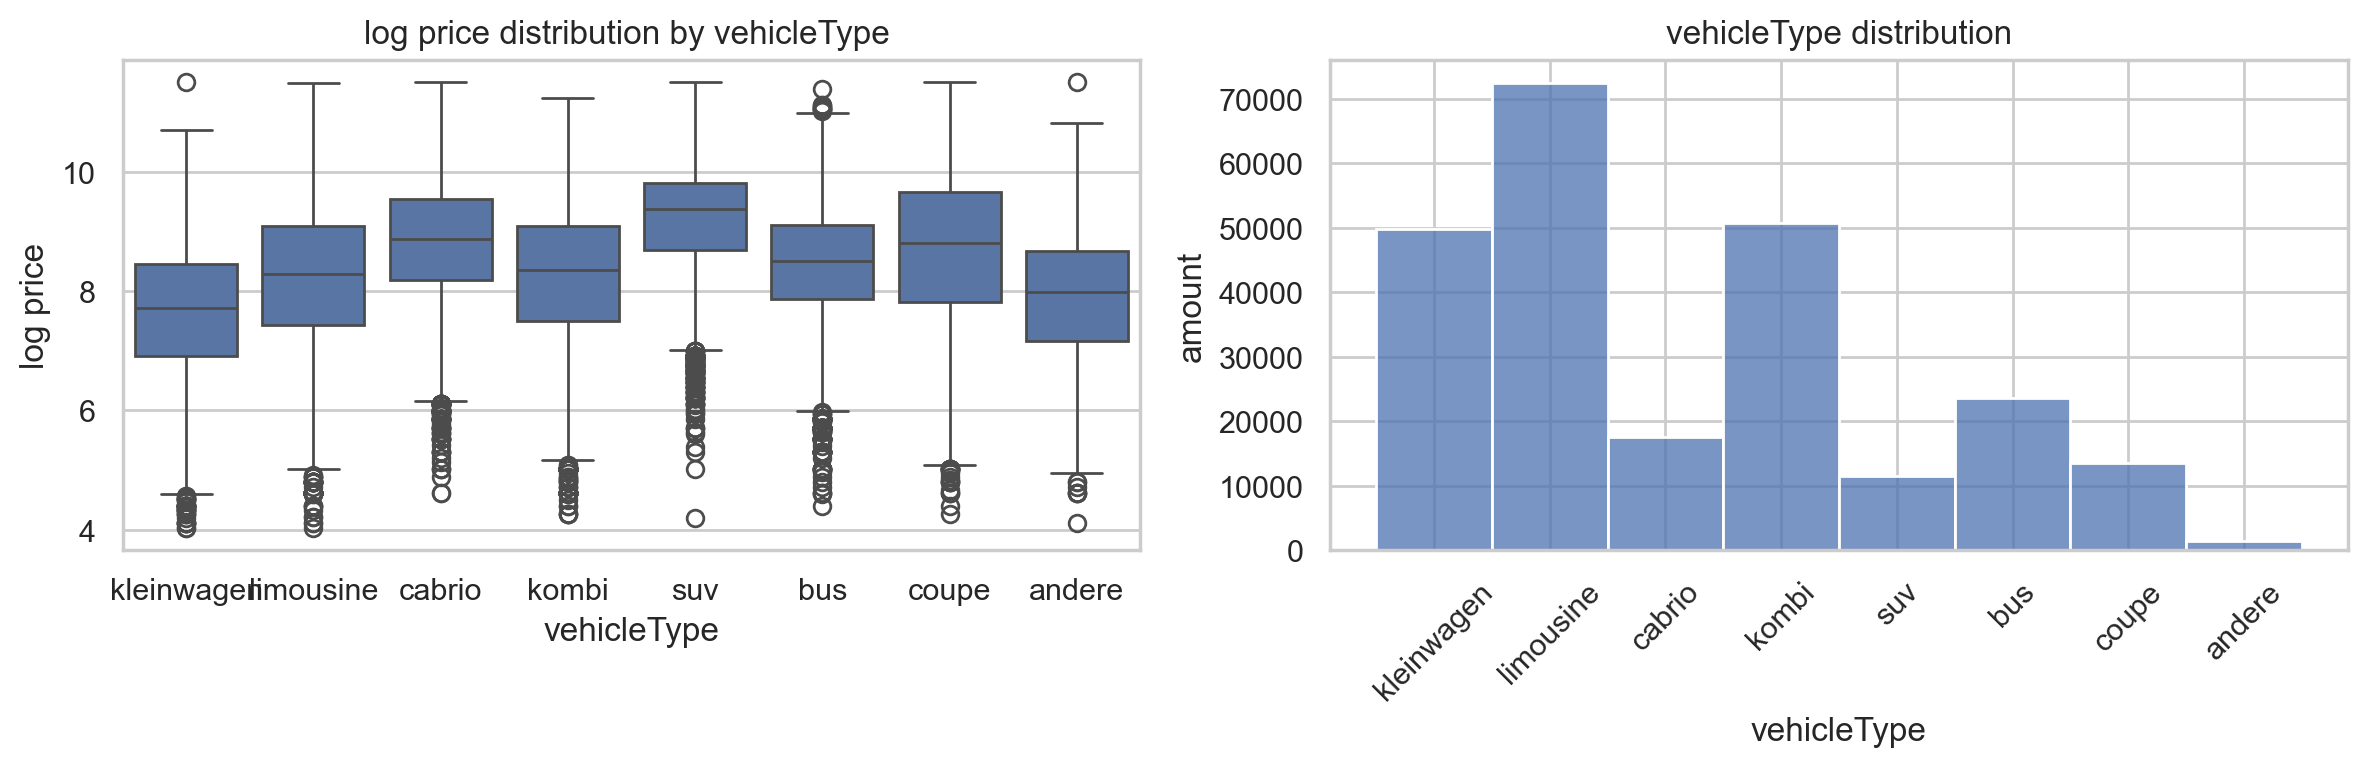

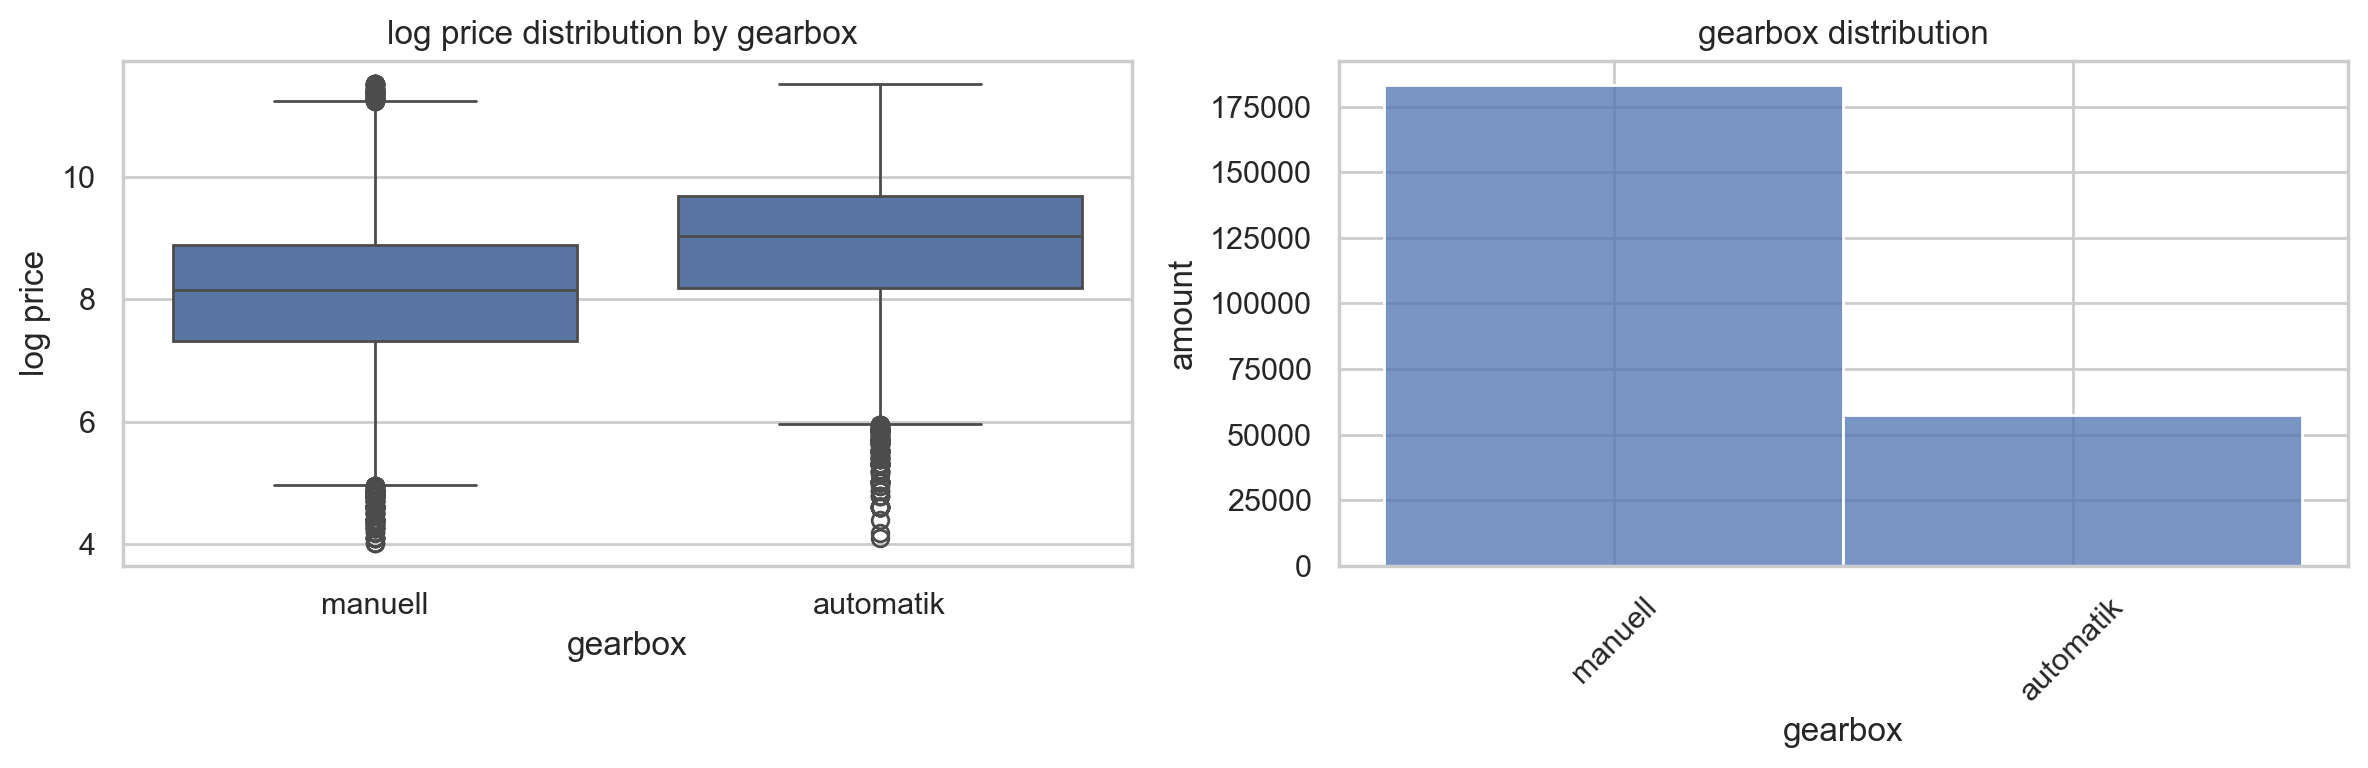

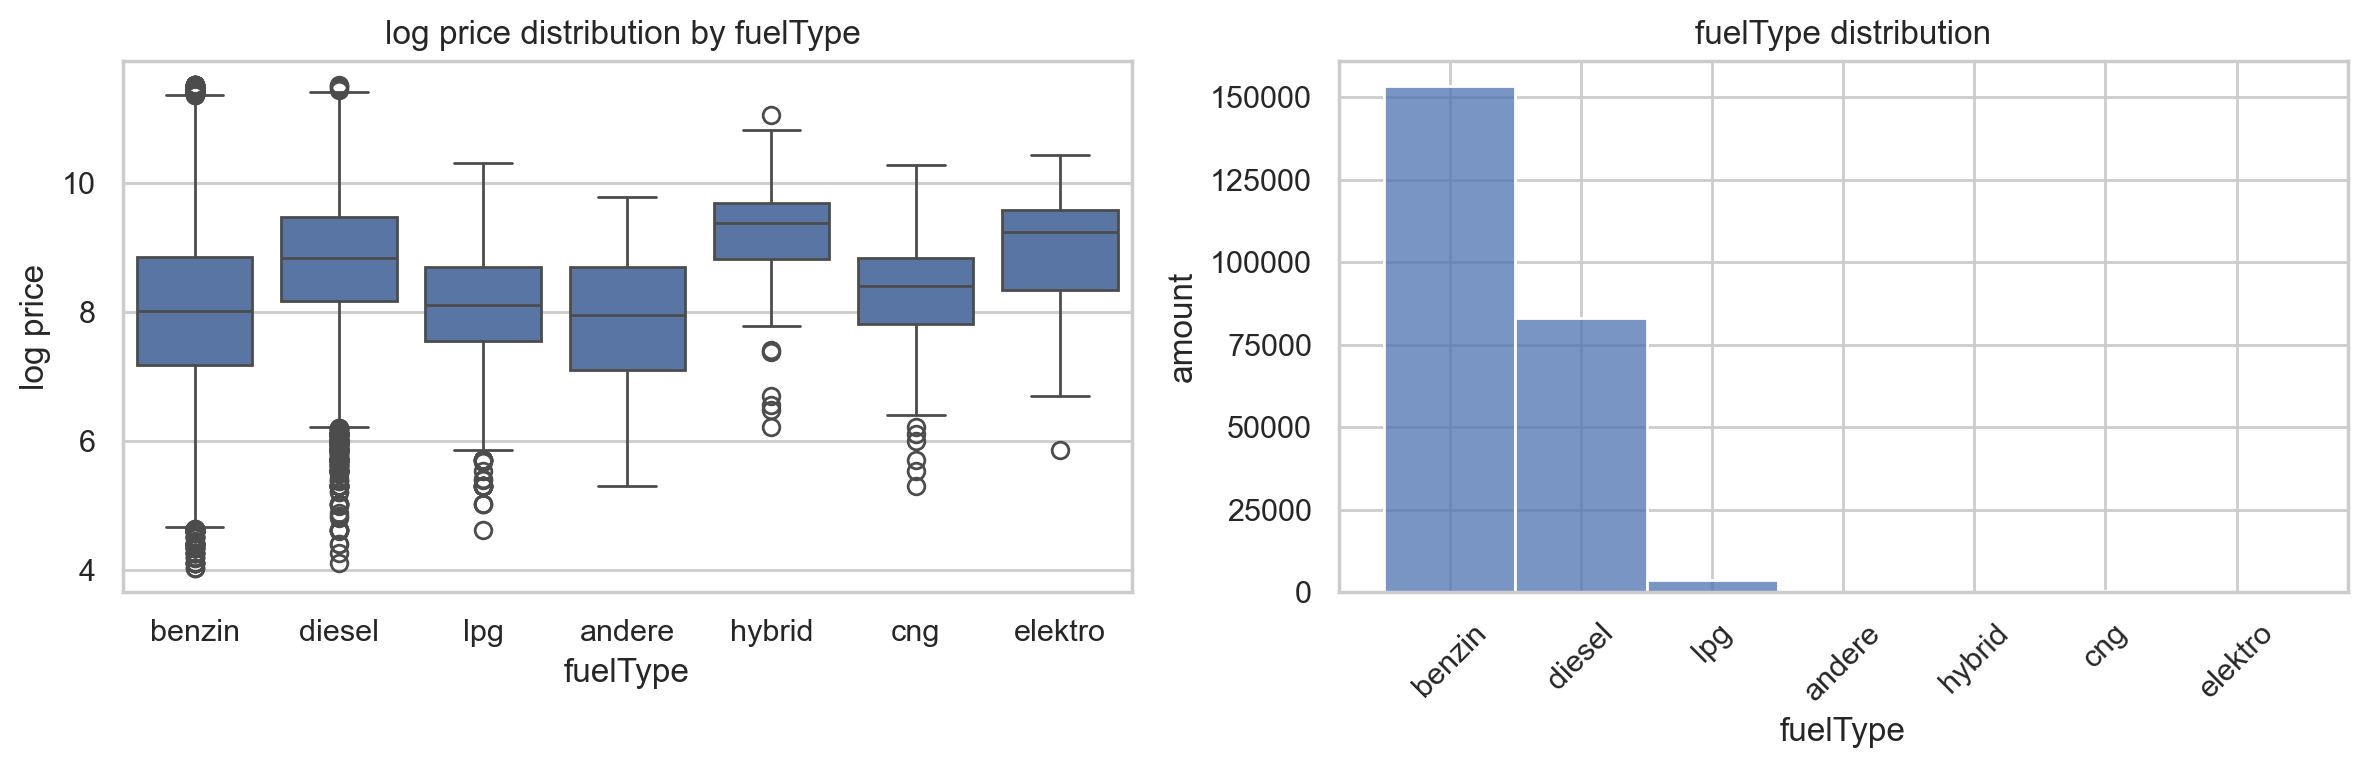

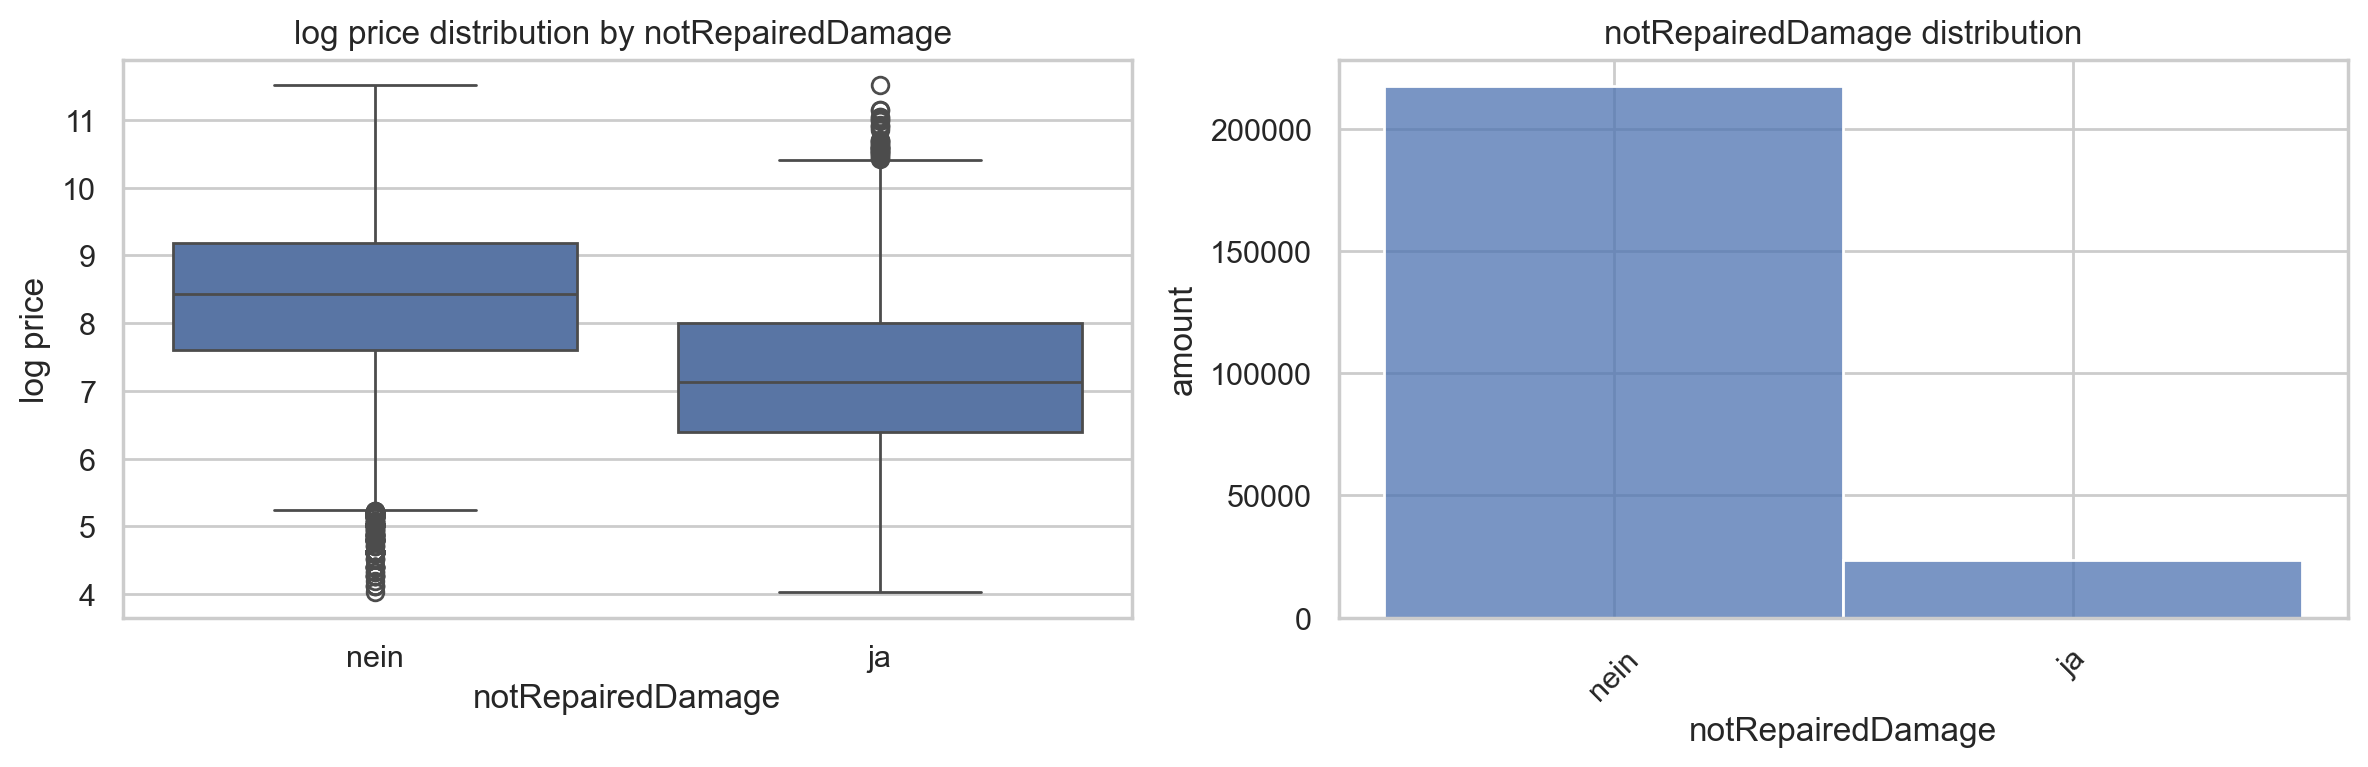

In [45]:
# Категориальныеи
categorical_columns = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']

for col in categorical_columns:
    _, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 4), dpi=200)
    
    # зависимость
    sns.boxplot(x = data[col], y=data["log_price"], ax=ax[0])
    ax[0].set_title(f'log price distribution by {col} ')
    ax[0].set_xlabel(f'{col}')
    ax[0].set_ylabel('log price')
    
    # Расределение
    sns.histplot(data[col], bins=30, ax=ax[1])
    ax[1].set_title(f'{col} distribution')
    ax[1].set_xlabel(f'{col}')
    ax[1].set_ylabel('amount')
    
    plt.xticks(rotation=45)
    plt.tight_layout() 
    
    plt.show()

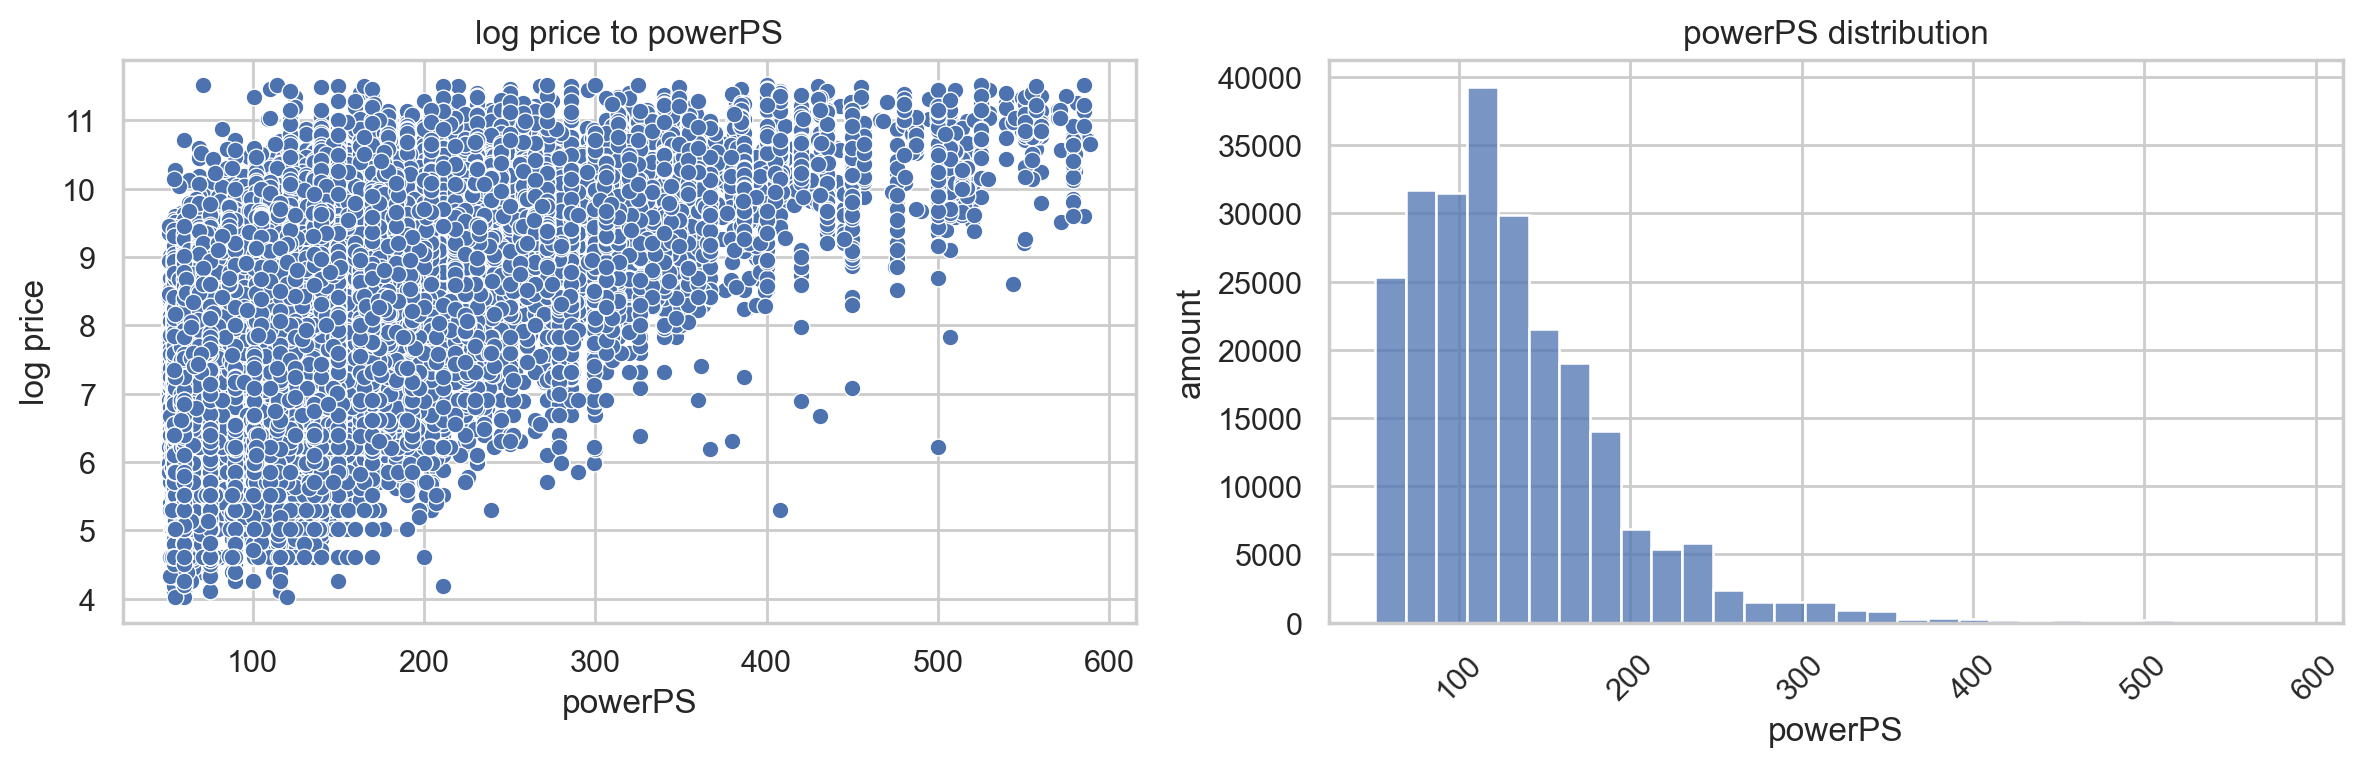

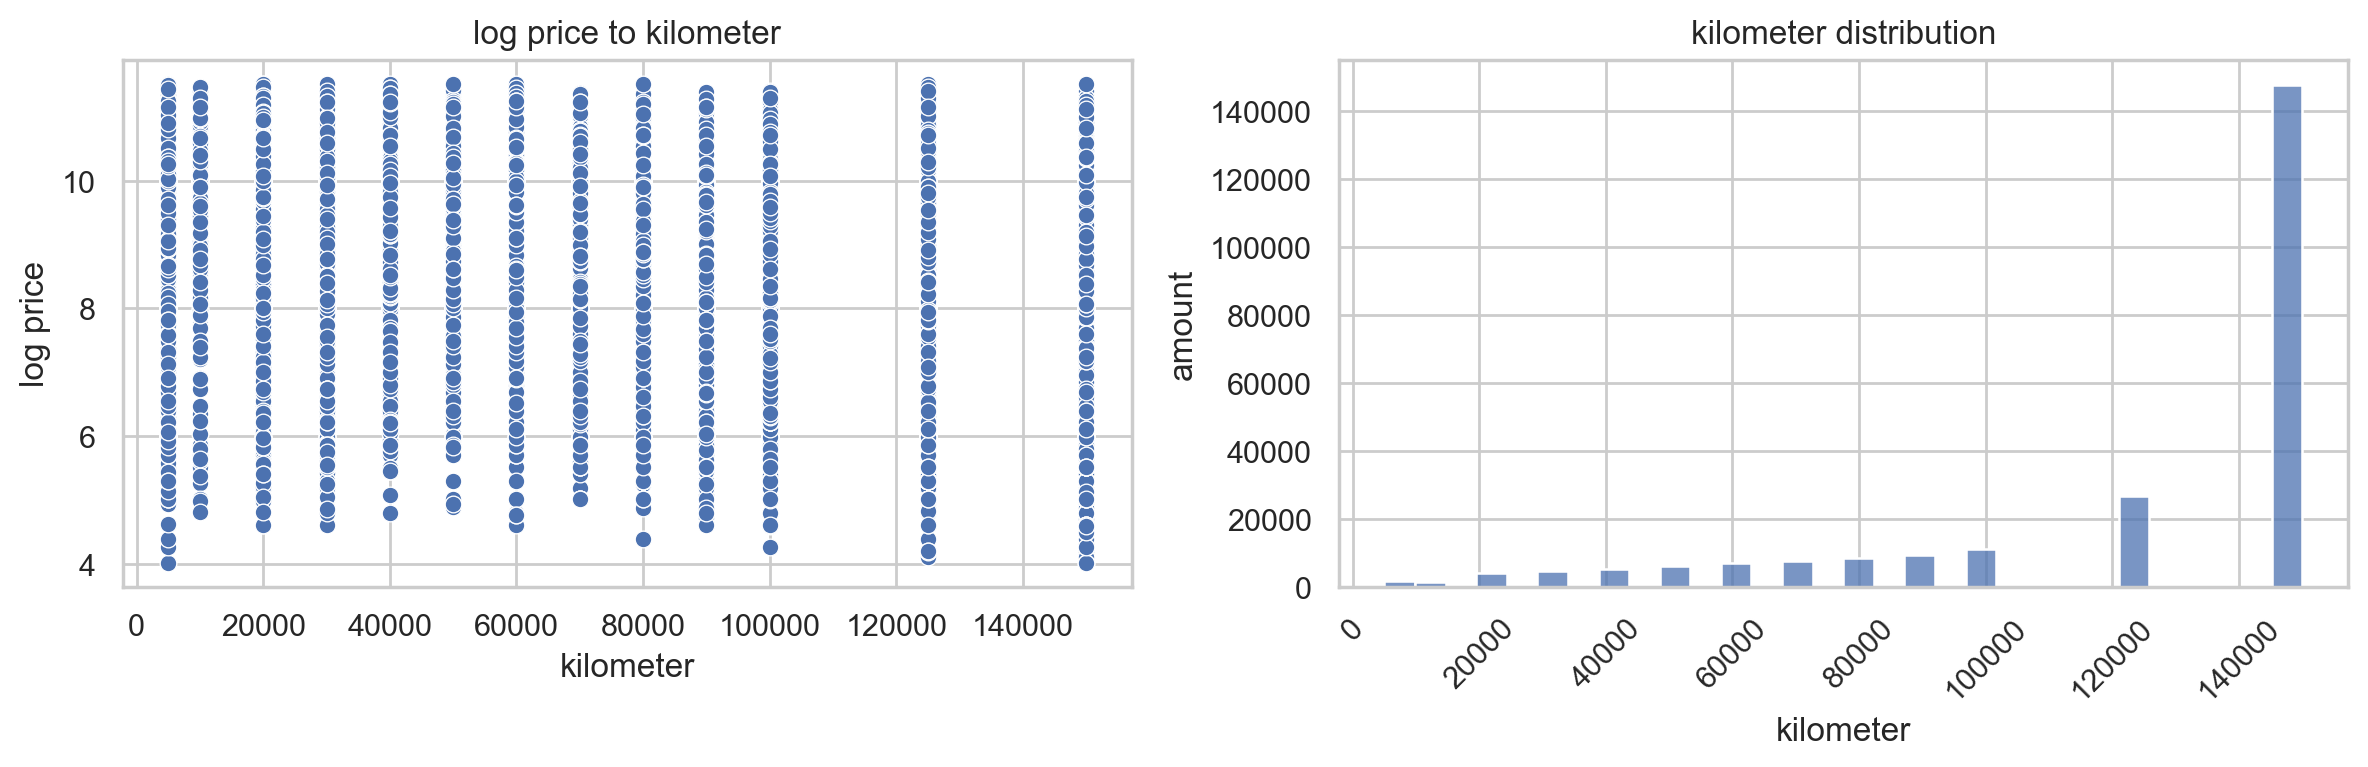

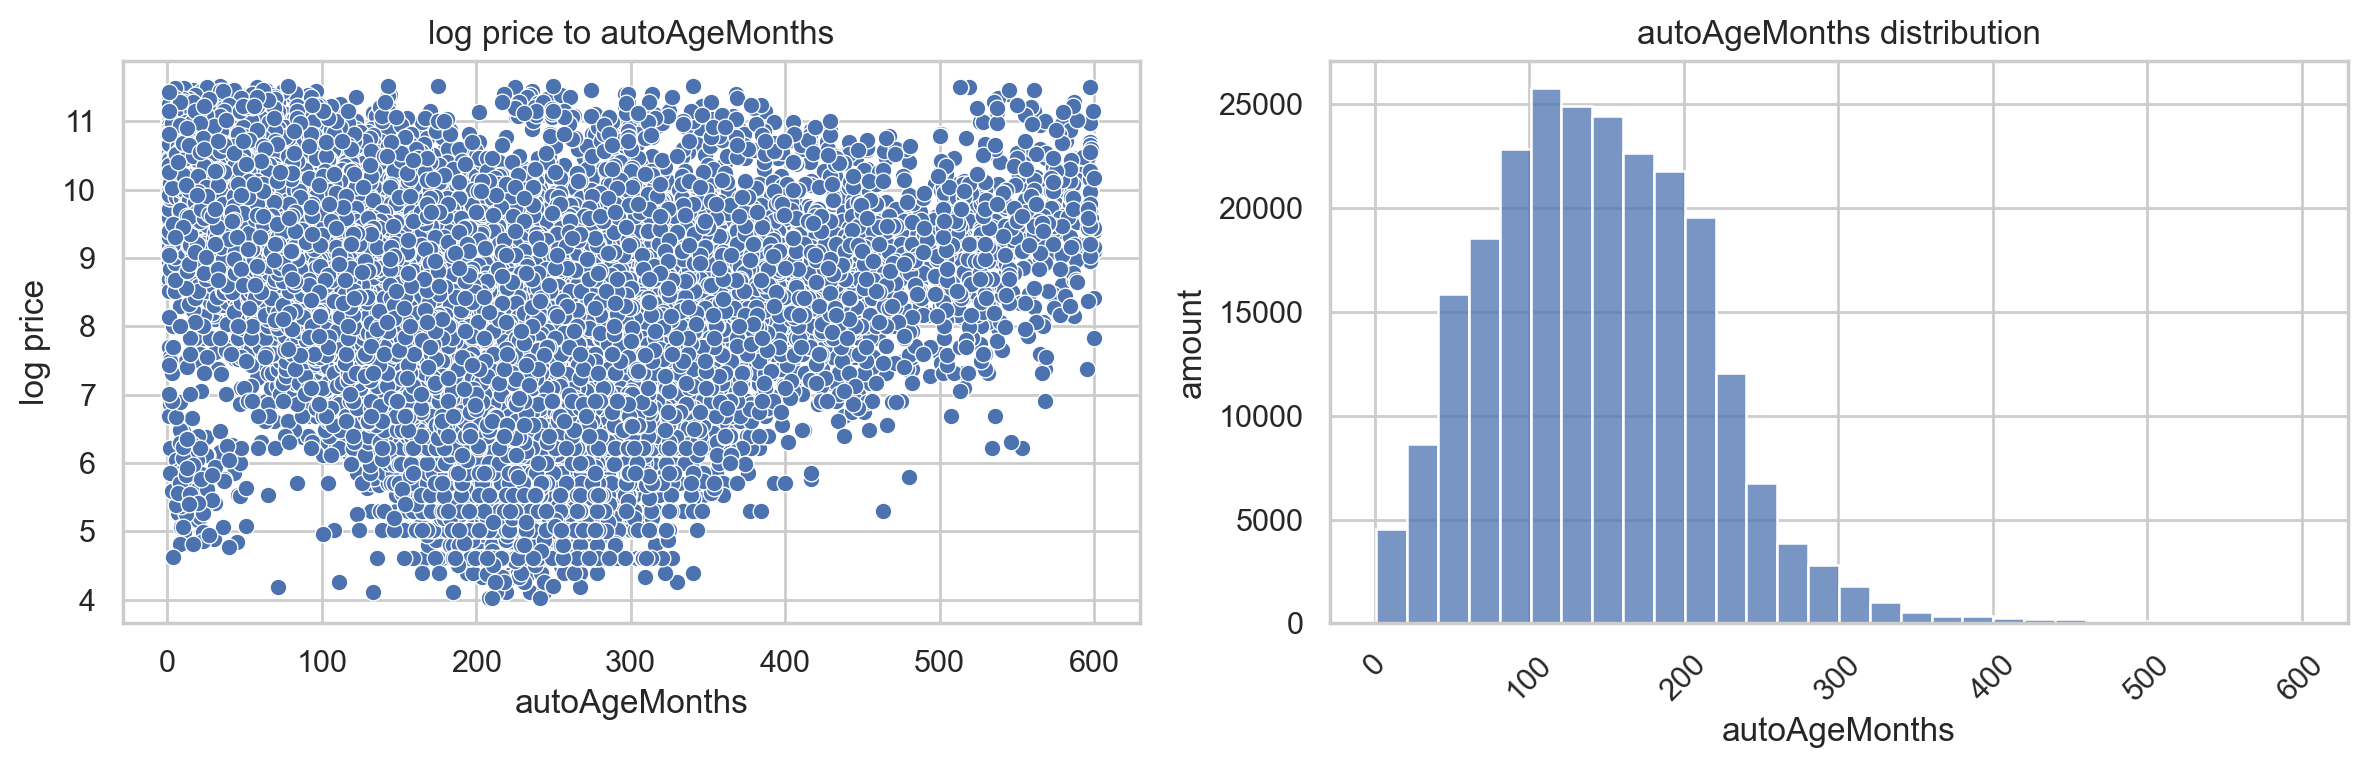

In [46]:
# числовые
numeric_columns = ['powerPS', 'kilometer', 'autoAgeMonths']
for col in numeric_columns:
    _, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 4), dpi=200)
    
    # зависимость
    sns.scatterplot(x = data[col], y=data["log_price"], ax=ax[0])
    ax[0].set_title(f'log price to {col}')
    ax[0].set_xlabel(f'{col}')
    ax[0].set_ylabel('log price')
    
    # Расределение
    sns.histplot(data[col], bins=30, ax=ax[1])
    ax[1].set_title(f'{col} distribution')
    ax[1].set_xlabel(f'{col}')
    ax[1].set_ylabel('amount')
    
    plt.xticks(rotation=45)
    plt.tight_layout() 
    plt.show()

Большие значения мощности автомобиля и его возраста скорее всего является реальными данными для спортивных автомобилей и раритетных автомобилей, но всё равно лучше удалю их как выбросы, чтобы улучшить обобщающие способности линейных моделей.

In [47]:
data = data[data["autoAgeMonths"] < 540]
data = data[data["powerPS"] < 520]

Не смотря на большое количество категорий, закодирую их всех с помощью oneHot, так как они явно не являются порядковыми. Вообще я не нашёл порядковых признаков в данных, разве что можно разбить мощности автомобилей на бины и использовать их как порядковые признаки. Числовые признаки буду скалировать с помощью StandardScaler (Потому что он уже импортирован ниже).

In [48]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'kilometer']
numeric = ['powerPS', 'autoAgeMonths']
other = []

In [49]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price'] # Ладно, видимо требуется использовать обычную цену, а не логарифмы в качестве таргета

Предобрабатывать данные нужно строго ПОСЛЕ разбиение на трейн/вал/тест

In [50]:
from sklearn.model_selection import train_test_split

# Стратифицирую регрессию по бинам
#y_bins = pd.qcut(x=y, q=10, labels=False, duplicates="drop")

X_train, X_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.2,random_state=123)

# Стратифицирую регрессию по бинам
#y_val_test_bins = pd.qcut(x=y_val_test, q=10, labels=False, duplicates="drop")

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=123)

In [51]:
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)

In [52]:
X_train.reset_index(inplace=True, drop = True)
X_val.reset_index(inplace=True, drop = True)
X_test.reset_index(inplace=True, drop = True)

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical),
    # Дропаю первый, чтобы не было мультиколлинеарности
    # ignore - игнорировать неизвестные категории (все столбцы False)
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
    ],
    remainder='passthrough'
)

X_train = column_transformer.fit_transform(X_train)
X_val = column_transformer.transform(X_val)
X_test = column_transformer.transform(X_test)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [77]:
from tqdm import tqdm # Страшно слишком долго сидеть без логов 
from sklearn.metrics import r2_score

descents = ['full', 'stochastic', 'momentum', 'adam']

result = pd.DataFrame(np.nan, index=range(len(descents)), columns=["descent", "iterations", "best_lambda", "loss_train", "loss_val", "loss_test", "best_r2_train", "best_r2_val", "best_r2_test"])

best_models = [None for _ in range(4)]

# 100*4 = 400 вариантов 
for descent in descents:
    best_r2_val = -1
    
    if descent == 'adam':
        lambdas = np.logspace(3, 3.6, 100) # Адам нормально обучается только с большим шагом
    elif descent == 'stochastic':
        lambdas = np.logspace(-0.5, -0.1, 100) # Здесь больше всего улетает с большим шагом
    else:
        lambdas = np.logspace(-0.5, 0.5, 100) # А остальные с большим шагом не обучаются. Градиент "улетает"
    
    for lmd in tqdm(lambdas):
        descent_config = {
        'descent_name': descent,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lmd
            }
        }
        
        model = LinearRegression(descent_config=descent_config)
        model.fit(X_train, y_train)
        
        y_val_pred = model.predict(X_val)
        
        score_val = r2_score(y_true=y_val, y_pred=y_val_pred)

        if score_val > best_r2_val:
            best_r2_val = score_val
            
            best_models[descents.index(descent)] = model
            
            result.iloc[descents.index(descent)] = [
                descent,
                model.descent.lr.iteration,
                lmd,
                model.calc_loss(X_train, y_train),
                model.calc_loss(X_val, y_val),
                model.calc_loss(X_test, y_test),
                r2_score(y_true=y_train, y_pred=model.predict(X_train)),
                best_r2_val,
                r2_score(y_true=y_test, y_pred=model.predict(X_test))
            ]

100%|██████████| 100/100 [02:32<00:00,  1.53s/it]


In [78]:
result

,descent,iterations,best_lambda,loss_train,loss_val,loss_test,best_r2_train,best_r2_val,best_r2_test
0,full,105.0,1.809572,1.886097e+07,1.820273e+07,1.847012e+07,0.699221,0.705288,0.705326
1,stochastic,235.0,0.710420,2.024325e+07,1.952603e+07,1.984045e+07,0.677178,0.683863,0.683463
2,momentum,94.0,0.921821,1.659369e+07,1.579724e+07,1.598201e+07,0.735378,0.744234,0.745021
3,adam,113.0,2693.413486,1.581573e+07,1.509340e+07,1.533079e+07,0.747784,0.755630,0.755411


Сначала я перебирал более широкий диапозон, потом смотрел 100 значений около лучшего

Результат может быть не самый лучший, потому что я увеличил порог (tolerance) c 1e-4 до 1e+4, чтобы обучение останавливалось раньше 300 эпох. Стоило использовать логарифм цены, но в задании почему-то используется оригинальная цена. Прошу не бить, если всё-таки нужно было делать не по заданию (в прошлый раз в чате говорили СТРОГО придерживаться задания)

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

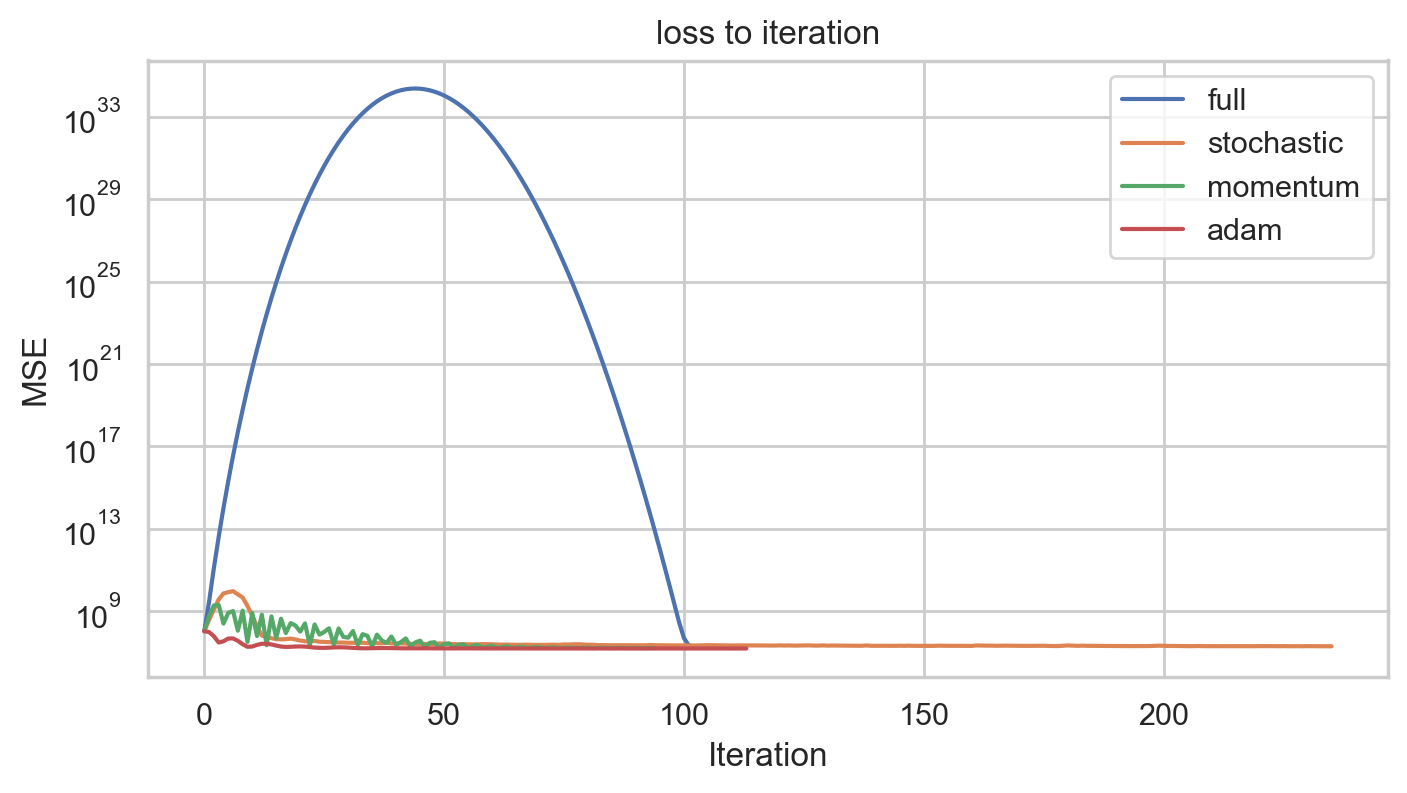

In [80]:
_, ax = plt.subplots(figsize=(8, 4), dpi=200)

for i in range(4):
    plt.plot(best_models[i].loss_history, label = descents[i])

ax.legend()

ax.set_title('loss to iteration')
ax.set_xlabel('Iteration')
ax.set_ylabel('MSE')
ax.set_yscale('log')

plt.show()

Полный градиентный спуск работал очень долго и в начале начал переобучаться, но затем довольно быстро (с точки зрения итераций) сошёлся на mse сопоставимым с другими оптимайзерами (но скорость работы я ему не прощу). Возможной причиной переобучения может служить то, что среднее по всем градиентам не всегда лучше батча.

Судя по графику, стохастический оптимайзер быстро сошёлся, но не до глобального, а до локального максимума, видимо не хватило инерции.

Adam показал себя лучше всего, как с точки зрения скорости обучения, так и с точки зрения качества. Моментум тоже оказался неплох, но обучался более дёрганно и долго.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [83]:
from time import time
from tqdm import tqdm

batch_sizes = np.arange(5, 500, 10)
k = 10
iterations_mean = []
times_mean = []

for batch_size in tqdm(batch_sizes):
    iterations = []
    times = []
    for _ in range(k):
        descent_config = {
        'descent_name': "stochastic",
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 0.7,
            "batch_size": 10
            }
        }
        model = LinearRegression(descent_config=descent_config)
        
        start = time()
        model.fit(X_train, y_train)
        end = time()
        
        iterations.append(model.descent.lr.iteration)
        times.append(end - start)
        
    iterations_mean.append(np.mean(iterations))
    times_mean.append(np.mean(times))

100%|██████████| 50/50 [17:58<00:00, 21.57s/it]


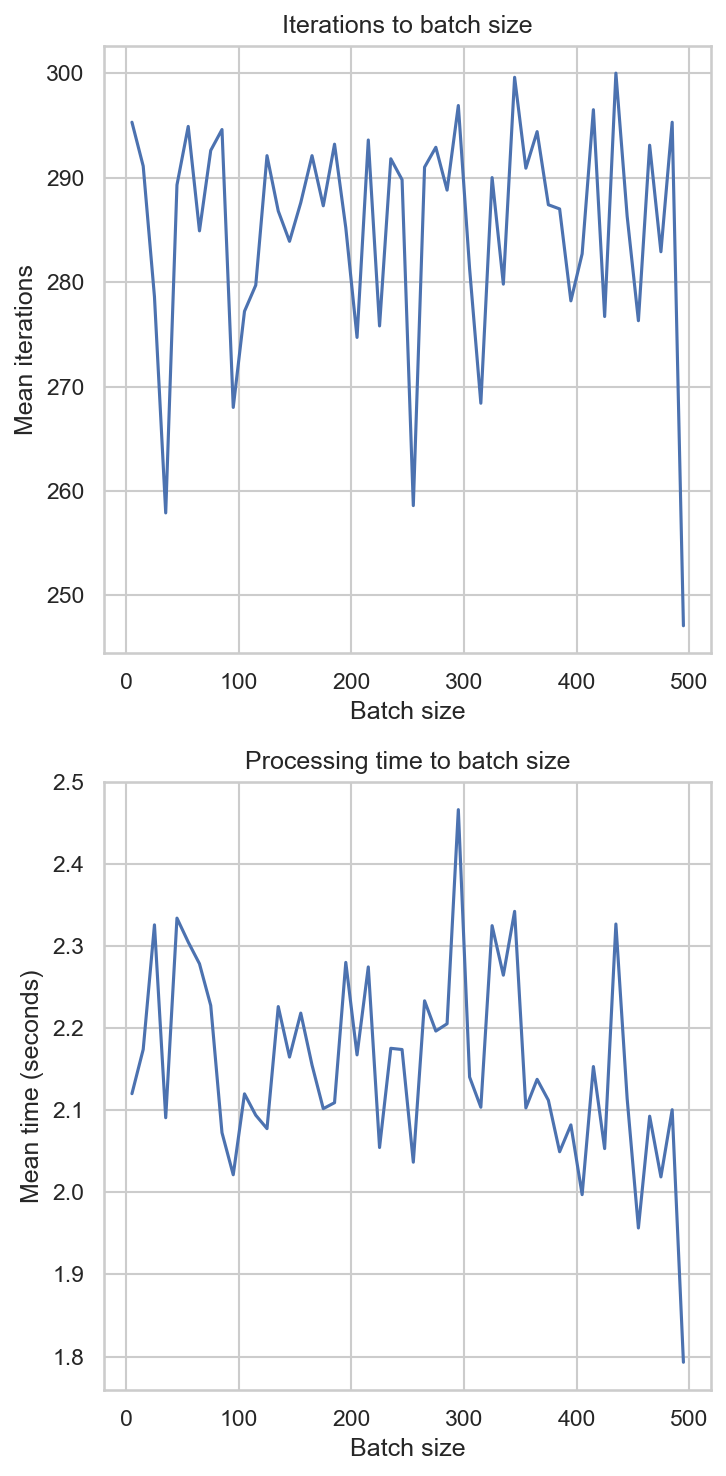

In [84]:
_, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 10), dpi=150)

sns.lineplot(x=batch_sizes, y=iterations_mean, ax=ax[0])
ax[0].set_title("Iterations to batch size")
ax[0].set_xlabel("Batch size")
ax[0].set_ylabel("Mean iterations")


sns.lineplot(x=batch_sizes, y=times_mean, ax=ax[1])
ax[1].set_title("Processing time to batch size")
ax[1].set_xlabel("Batch size")
ax[1].set_ylabel("Mean time (seconds)")

plt.tight_layout()
plt.show()

Изначально обучение всегда заканвилось на последней итерации, даже если я поставлю огромное максимальное число итераций, поэтому я поменял tolerance с 1e-4 до 1е+4. Скорее всего такая потребность была вызвана разночтением задания по предобработке, где используется стандартную цену, но, как я уже писал выше, лучше использовать логарифм цены. 

В данном случае выглядит так, что время выполнения и количество итерации имеет случайных характер. При уменьшении порогов остановки количество итераций становится максимальным. Скорее всего можно добиться хоть немного репрезентативных результатов, если увеличить максимальное количество шагов, уменьшить порог для критерия останова и поигравшись с длинной шага, но в задании это не требуется, а я уже потратил слишком много времени на то, чтобы показать преждевременную остановку обучения (До этого я часа пытался искать ошибки в коде, но оказалось нужно было ОЧЕНЬ сильно увеличить порог)

Скорее всего, в общем случае, большой батч должен выигрывать у маленького за счёт того, что функция будет быстрее сходиться и в реальности реализации большие батчи проще обрабатывать параллельно. В данном случае, для выбранной длины шага подходит размеры батча 30, 260 и 500, но скорее всего это случайность.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:
* https://contest.yandex.ru/contest/70588/run-report/124598903/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [89]:
# Отсавлю также 25 тестов для адама и по 15 для остальных (5 разных коэффициентов регуляризации для каждого)

from tqdm import tqdm # Страшно слишком долго сидеть без логов 
from sklearn.metrics import r2_score

descents = ['full', 'stochastic', 'momentum', 'adam']

result_reg = pd.DataFrame(np.nan, index=range(len(descents)), columns=["descent", "iterations", "best_mu", "best_lambda", "loss_train", "loss_val", "loss_test", "best_r2_train", "best_r2_val", "best_r2_test"])

best_models_reg = [None for _ in range(4)]

# 10*4*10 = 400 вариантов 
for descent in descents:
    best_r2_val = -1
        
    if descent == 'adam':
        lambdas = np.logspace(3, 3.6, 10) # Адам нормально обучается только с большим шагом
    elif descent == 'stochastic':
        lambdas = np.logspace(-0.3, -0.1, 10) # Здесь больше всего улетает с большим шагом
    else:
        lambdas = np.logspace(-0.3, 0.3, 10) # А остальные с большим шагом не обучаются. Градиент "улетает"
    
    mus = np.logspace(-6, -2, 10)
    
    for lmd in tqdm(lambdas):
        for mu in mus:
            descent_config = {
            'descent_name': descent,
            'regularized': True,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_': lmd,
                'mu': mu
                }
            }
            
            model = LinearRegression(descent_config=descent_config)
            model.fit(X_train, y_train)
            
            y_val_pred = model.predict(X_val)
            
            score_val = r2_score(y_true=y_val, y_pred=y_val_pred)
    
            if score_val > best_r2_val:
                best_r2_val = score_val
                
                best_models_reg[descents.index(descent)] = model
                
                result_reg.iloc[descents.index(descent)] = [
                    descent,
                    model.descent.lr.iteration,
                    mu,
                    lmd,
                    model.calc_loss(X_train, y_train),
                    model.calc_loss(X_val, y_val),
                    model.calc_loss(X_test, y_test),
                    r2_score(y_true=y_train, y_pred=model.predict(X_train)),
                    best_r2_val,
                    r2_score(y_true=y_test, y_pred=model.predict(X_test))
                ]

100%|██████████| 10/10 [02:04<00:00, 12.45s/it]


In [90]:
result_reg # Качество на тесте стало чуть лучше на всё, кроме адама. Видимо там была подобрана лучшая лябда

,descent,iterations,best_mu,best_lambda,loss_train,loss_val,loss_test,best_r2_train,best_r2_val,best_r2_test
0,full,71.0,0.000003,1.995262,1.940226e+07,1.874812e+07,1.903569e+07,0.690589,0.696458,0.696303
1,stochastic,300.0,0.001292,0.754706,1.976236e+07,1.907890e+07,1.938527e+07,0.684847,0.691102,0.690725
2,momentum,100.0,0.000001,1.258925,1.634008e+07,1.554972e+07,1.572154e+07,0.739422,0.748242,0.749177
3,adam,114.0,0.000003,2928.644565,1.581893e+07,1.509365e+07,1.533333e+07,0.747733,0.755626,0.755370


In [91]:
result

,descent,iterations,best_lambda,loss_train,loss_val,loss_test,best_r2_train,best_r2_val,best_r2_test
0,full,105.0,1.809572,1.886097e+07,1.820273e+07,1.847012e+07,0.699221,0.705288,0.705326
1,stochastic,235.0,0.710420,2.024325e+07,1.952603e+07,1.984045e+07,0.677178,0.683863,0.683463
2,momentum,94.0,0.921821,1.659369e+07,1.579724e+07,1.598201e+07,0.735378,0.744234,0.745021
3,adam,113.0,2693.413486,1.581573e+07,1.509340e+07,1.533079e+07,0.747784,0.755630,0.755411


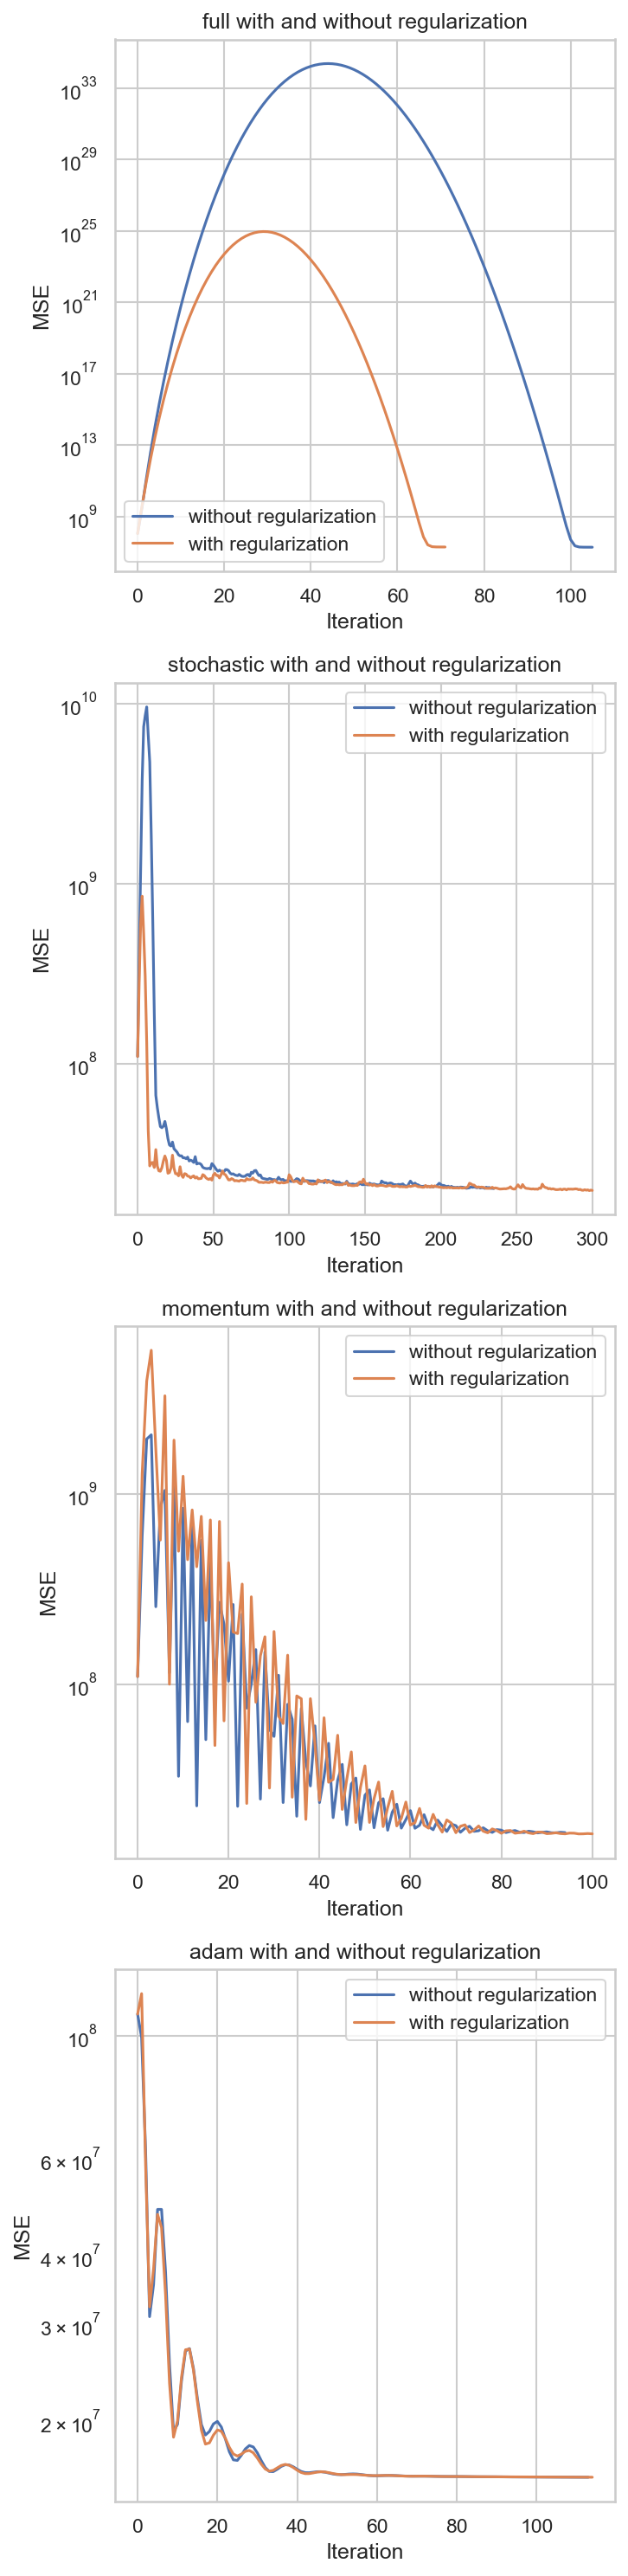

In [92]:
_, ax = plt.subplots(nrows=4, ncols=1, figsize=(5, 20), dpi=150)

descents = ['full', 'stochastic', 'momentum', 'adam']

for descent in descents:
    index= descents.index(descent)
    ax[index].plot(best_models[index].loss_history, label="without regularization")
    ax[index].plot(best_models_reg[index].loss_history, label="with regularization")
    
    ax[index].set_title(f'{descent} with and without regularization')
    ax[index].set_xlabel('Iteration')
    ax[index].set_ylabel('MSE')
    ax[index].set_yscale('log')
    ax[index].legend()

plt.tight_layout()
plt.show()

В моём случае регуляризация немного уменьшает количество итераций обучения и ещё меньше улучшает итоговое качество, но, в случае с адамом разница едва заметна

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь, чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

$$ L(y, a) = \log\left(\cosh(a - y)\right) $$

$$ L(y_i, \langle w, x_i \rangle) = \log\left(\cosh(\langle w, x_i \rangle - y_i)\right) $$

$$ \frac{dL}{da} = \tanh(a - y) $$

$$ \nabla_w L = x_i \tanh(\langle w, x_i \rangle - y_i) $$

&Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

Буду перибирать по 3 значения, чтобы ускорить выполнение задания. Возьму за основу мою вторую попытку выполнить пятое задание, но буду использовать большие значения

In [96]:
from tqdm import tqdm # Страшно слишком долго сидеть без логов 
from sklearn.metrics import r2_score
from descents import LossFunction

descents = ['full', 'stochastic', 'momentum', 'adam']

result_logcosh = pd.DataFrame(np.nan, index=range(len(descents)), columns=["descent", "iterations", "best_lambda", "best_r2_train", "best_r2_val", "best_r2_test"])

# 3*4 = 12 вариантов 
for descent in descents:
    best_r2_val = -1
    if descent == 'adam':
        lambdas = np.logspace(4.5, 4.8, 10)
    else:
        lambdas = np.logspace(4, 4.5, 10)
    
    for lmd in tqdm(lambdas):
        descent_config = {
        'descent_name': descent,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lmd,
            'loss_function': LossFunction.LogCosh,
            }
        }
        
        model = LinearRegression(descent_config=descent_config)
        model.fit(X_train, y_train)
        
        y_val_pred = model.predict(X_val)
        
        score_val = r2_score(y_true=y_val, y_pred=y_val_pred)

        if score_val > best_r2_val:
            best_r2_val = score_val
            
            result_logcosh.iloc[descents.index(descent)] = [
                    descent,
                    model.descent.lr.iteration,
                    lmd,
                    r2_score(y_true=y_train, y_pred=model.predict(X_train)),
                    best_r2_val,
                    r2_score(y_true=y_test, y_pred=model.predict(X_test))
                ]

100%|██████████| 10/10 [00:59<00:00,  5.97s/it]


In [97]:
result_logcosh

,descent,iterations,best_lambda,best_r2_train,best_r2_val,best_r2_test
0,full,300.0,24484.367468,0.650929,0.654687,0.655978
1,stochastic,300.0,18957.356524,0.662564,0.665991,0.667154
2,momentum,300.0,31622.776602,0.704190,0.713591,0.713736
3,adam,300.0,63095.734448,0.722557,0.730676,0.731205


In [98]:
result

,descent,iterations,best_lambda,loss_train,loss_val,loss_test,best_r2_train,best_r2_val,best_r2_test
0,full,105.0,1.809572,1.886097e+07,1.820273e+07,1.847012e+07,0.699221,0.705288,0.705326
1,stochastic,235.0,0.710420,2.024325e+07,1.952603e+07,1.984045e+07,0.677178,0.683863,0.683463
2,momentum,94.0,0.921821,1.659369e+07,1.579724e+07,1.598201e+07,0.735378,0.744234,0.745021
3,adam,113.0,2693.413486,1.581573e+07,1.509340e+07,1.533079e+07,0.747784,0.755630,0.755411


Результаты получились чуть хуже, чем у mse. Скорее всего потому, что r2 предназначена для mse и я перебирал в 10 раз меньше параметров.

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Единственный раз, когда в Москве был кто-то из моих родственников/друзей/знакомых был неделю назад, когда мой друг, во время 4-го месяца службы в армии остановился проездном на Киевском вокзале. Я, сразу как узнал, приехал к нему из Одинцово и привёз по его просьбе самый большой бургер, который смог быстро купить в тц напротив. Он ехал как срочник в Курск, надеюсь он выживет 😥

![Последняя трапеза](https://imgur.com/wO76iUd.gif)

Уже из моих собственных рецептов представляю вниманию фото вкуснейших бутербродов с хлебцами, печенью трески, авокадо и яйцами пашот. Думаю такой рецепт не оставит никого равнодушным. Выглядит очень аппетитно, а на вкус ещё лучше 😊

![Кулинарный шедевр](https://imgur.com/TJms1IH.jpg)

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [101]:
from tqdm import tqdm
from sklearn.metrics import r2_score

lambdas = np.logspace(3, 3.5, 100) # Возьму примерно как у адама

result_nadam = pd.DataFrame(np.nan, index=range(1), columns=["descent", "iterations", "best_lambda", "loss_train", "loss_val", "loss_test", "best_r2_train", "best_r2_val", "best_r2_test"])

best_r2_val = -1

for lmd in tqdm(lambdas):
    descent_config = {
    'descent_name': 'nadam',
    'kwargs': {
        'dimension': X_train.shape[1],
        'lambda_': lmd
        }
    }
    
    model = LinearRegression(descent_config=descent_config)
    model.fit(X_train, y_train)
    
    
    y_val_pred = model.predict(X_val)
    
    score_val = r2_score(y_true=y_val, y_pred=y_val_pred)

    if score_val > best_r2_val:
        best_r2_val = score_val
        
        result_nadam.iloc[0] = [
            "nadam",
            model.descent.lr.iteration,
            lmd,
            model.calc_loss(X_train, y_train),
            model.calc_loss(X_val, y_val),
            model.calc_loss(X_test, y_test),
            r2_score(y_true=y_train, y_pred=model.predict(X_train)),
            best_r2_val,
            r2_score(y_true=y_test, y_pred=model.predict(X_test))
        ]

100%|██████████| 100/100 [02:39<00:00,  1.60s/it]


In [102]:
result_nadam

,descent,iterations,best_lambda,loss_train,loss_val,loss_test,best_r2_train,best_r2_val,best_r2_test
0,nadam,123.0,1337.404026,1.585779e+07,1.512707e+07,1.539898e+07,0.747113,0.755085,0.754323


In [103]:
result

,descent,iterations,best_lambda,loss_train,loss_val,loss_test,best_r2_train,best_r2_val,best_r2_test
0,full,105.0,1.809572,1.886097e+07,1.820273e+07,1.847012e+07,0.699221,0.705288,0.705326
1,stochastic,235.0,0.710420,2.024325e+07,1.952603e+07,1.984045e+07,0.677178,0.683863,0.683463
2,momentum,94.0,0.921821,1.659369e+07,1.579724e+07,1.598201e+07,0.735378,0.744234,0.745021
3,adam,113.0,2693.413486,1.581573e+07,1.509340e+07,1.533079e+07,0.747784,0.755630,0.755411


Nadam показал неплохие результаты, но не сильно лучше, чем у adam. Возможно в более сложных моделях он покажет себя лучше

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

MAE

$$ 
    L(y, a) = |y - a| 
$$

$$ 
    \frac{dL}{da} = \begin{cases} -1, & \text{если } y - a > 0 \\ 
    1, & \text{если } y - a < 0 \end{cases} 
$$

$$ 
    L(y_i, \langle w, x_i \rangle) = |y_i - \langle w, x_i \rangle| 
$$

$$ 
    \nabla_w L = \begin{cases} -x_i, & \text{если } y_i - \langle w, x_i \rangle > 0 \\
     \ x_i, & \text{если } y_i - \langle w, x_i \rangle < 0 \end{cases} 
$$

Huber

$$ 
    L(y, a) = \begin{cases} \frac{1}{2}(y - a)^2, & \text{если } |y - a| \leq \delta \\ 
    \delta (|y - a| - \frac{1}{2}\delta), & \text{иначе} \end{cases} 
$$

$$ 
    \frac{dL}{da} = \begin{cases} -(y - a), & \text{если } |y - a| \leq \delta \\
     -\delta \cdot \text{sign}(y - a), & \text{иначе} \end{cases} 
    $$

$$ 
    L(y_i, \langle w, x_i \rangle) = \begin{cases} \frac{1}{2}(y_i - \langle w, x_i \rangle)^2, & \text{если } |y_i - \langle w, x_i \rangle| \leq \delta \\ 
    \delta (|y_i - \langle w, x_i \rangle| - \frac{1}{2}\delta), & \text{иначе} \end{cases} 
$$

$$ 
    \nabla_w L = \begin{cases} -(y_i - \langle w, x_i \rangle) x_i, & \text{если } |y_i - \langle w, x_i \rangle| \leq \delta \\ 
    -\delta \cdot \text{sign}(y_i - \langle w, x_i \rangle) x_i, & \text{иначе} \end{cases} 
$$

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [133]:
from tqdm import tqdm # Страшно слишком долго сидеть без логов 
from sklearn.metrics import r2_score
from descents import LossFunction

descents = ['full', 'stochastic', 'momentum', 'adam']

result_MAE= pd.DataFrame(np.nan, index=range(len(descents)), columns=["descent", "iterations", "best_lambda", "best_r2_train", "best_r2_val", "best_r2_test"])

# 4*100 = 400 вариантов 
for descent in descents:
    best_r2_val = -1
    if descent == 'adam':
        lambdas = np.logspace(3.2, 3.8, 100)
    else:
        lambdas = np.logspace(-1, 0.2, 100)
    
    for lmd in tqdm(lambdas):
        descent_config = {
        'descent_name': descent,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lmd,
            'loss_function': LossFunction.MSE,
            }
        }
        
        model = LinearRegression(descent_config=descent_config)
        model.fit(X_train, y_train)
        
        y_val_pred = model.predict(X_val)
        
        score_val = r2_score(y_true=y_val, y_pred=y_val_pred)

        if score_val > best_r2_val:
            best_r2_val = score_val
            
            result_MAE.iloc[descents.index(descent)] = [
                    descent,
                    model.descent.lr.iteration,
                    lmd,
                    r2_score(y_true=y_train, y_pred=model.predict(X_train)),
                    best_r2_val,
                    r2_score(y_true=y_test, y_pred=model.predict(X_test))
                ]

100%|██████████| 100/100 [02:06<00:00,  1.27s/it]


In [134]:
result_MAE

,descent,iterations,best_lambda,best_r2_train,best_r2_val,best_r2_test
0,full,81.0,1.584893,0.691149,0.696641,0.696555
1,stochastic,240.0,0.667179,0.676095,0.681139,0.680409
2,momentum,87.0,0.834088,0.733662,0.742428,0.743148
3,adam,113.0,2693.413486,0.747784,0.755630,0.755411


In [127]:
from tqdm import tqdm # Страшно слишком долго сидеть без логов 
from sklearn.metrics import r2_score
from descents import LossFunction

descents = ['full', 'stochastic', 'momentum', 'adam']

result_huber= pd.DataFrame(np.nan, index=range(len(descents)), columns=["descent", "iterations", "best_lambda", "best_r2_train", "best_r2_val", "best_r2_test"])

# 100*4 = 400 вариантов 
for descent in descents:
    best_r2_val = -1
    if descent == 'adam':
        lambdas = np.logspace(4,4.8, 100)
    else:
        lambdas = np.logspace(4,4.8, 100)
    
    for lmd in tqdm(lambdas):
        descent_config = {
        'descent_name': descent,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lmd,
            'loss_function': LossFunction.Huber
            }
        }
        
        model = LinearRegression(descent_config=descent_config)
        model.fit(X_train, y_train)
        
        y_val_pred = model.predict(X_val)
        
        score_val = r2_score(y_true=y_val, y_pred=y_val_pred)

        if score_val > best_r2_val:
            best_r2_val = score_val
            
            result_huber.iloc[descents.index(descent)] = [
                    descent,
                    model.descent.lr.iteration,
                    lmd,
                    r2_score(y_true=y_train, y_pred=model.predict(X_train)),
                    best_r2_val,
                    r2_score(y_true=y_test, y_pred=model.predict(X_test))
                ]

100%|██████████| 100/100 [08:25<00:00,  5.05s/it]


In [135]:
print("mse")
result

mse


,descent,iterations,best_lambda,loss_train,loss_val,loss_test,best_r2_train,best_r2_val,best_r2_test
0,full,105.0,1.809572,1.886097e+07,1.820273e+07,1.847012e+07,0.699221,0.705288,0.705326
1,stochastic,235.0,0.710420,2.024325e+07,1.952603e+07,1.984045e+07,0.677178,0.683863,0.683463
2,momentum,94.0,0.921821,1.659369e+07,1.579724e+07,1.598201e+07,0.735378,0.744234,0.745021
3,adam,113.0,2693.413486,1.581573e+07,1.509340e+07,1.533079e+07,0.747784,0.755630,0.755411


In [136]:
print("logcosh")
result_logcosh

logcosh


,descent,iterations,best_lambda,best_r2_train,best_r2_val,best_r2_test
0,full,300.0,24484.367468,0.650929,0.654687,0.655978
1,stochastic,300.0,18957.356524,0.662564,0.665991,0.667154
2,momentum,300.0,31622.776602,0.704190,0.713591,0.713736
3,adam,300.0,63095.734448,0.722557,0.730676,0.731205


In [137]:
print("MAE")
result_MAE

MAE


,descent,iterations,best_lambda,best_r2_train,best_r2_val,best_r2_test
0,full,81.0,1.584893,0.691149,0.696641,0.696555
1,stochastic,240.0,0.667179,0.676095,0.681139,0.680409
2,momentum,87.0,0.834088,0.733662,0.742428,0.743148
3,adam,113.0,2693.413486,0.747784,0.755630,0.755411


In [138]:
print("Huber")
result_huber

Huber


,descent,iterations,best_lambda,best_r2_train,best_r2_val,best_r2_test
0,full,300.0,24427.486834,0.650922,0.654684,0.655969
1,stochastic,300.0,44306.214576,0.662531,0.667095,0.668805
2,momentum,209.0,31112.097628,0.710587,0.719990,0.720099
3,adam,300.0,63095.734448,0.723115,0.731239,0.731813


Лучше оказалась MSE и MAE, скорее потому, что метрика r2 предназначена для mse. К тому же для mse и mae я дольше подбирал параметры (делал больше запусков с разными параметрами). При этом на Huber и Logcosh достигнуто максимальное количество итераций, что может говорить о плохо подобранных гиперпараметрах или переобучении, можно было бы поэкспериментировать с максимальным количеством итераций.

Отдельно:
Полная: Ожидаемо лучше для MSE и MAE, на logcosh и huber одинаково плохо
Стохастическая: Везде так себе, но на MSE и MAE тоже лучше.
Моментум: Как обычно, хорошо у MSE у MAE, у остальных функций потерь r2 на тесте на пару процентов ниже
Адам: Показал себя лучше всего, на MSE и MAE качество опять на пару процентов лучше на r2

Итого, выигрывает MSE, особенное для R2. Но MAE не сильно отстаёт.